In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

Preparing the data


In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/home/fatima_moqran/.fastai/data/imdb_sample/texts.csv')]

In [5]:
df = pd.read_csv(path/'texts.csv')
df.head(10)

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False
5,negative,"From the start, you know how this movie will e...",False
6,negative,There were a lot of truly great horror movies ...,False
7,negative,I was fortunate enough to meet George Pal (and...,False
8,negative,This film is the freshman effort of Stephanie ...,False
9,negative,Greg Davis and Bryan Daly take some crazed sta...,False


In [7]:
df['text'][2]

'Every once in a long while a movie will come along that will be so awful that I feel compelled to warn people. If I labor all my days and I can save but one soul from watching this movie, how great will be my joy.<br /><br />Where to begin my discussion of pain. For starters, there was a musical montage every five minutes. There was no character development. Every character was a stereotype. We had swearing guy, fat guy who eats donuts, goofy foreign guy, etc. The script felt as if it were being written as the movie was being shot. The production value was so incredibly low that it felt like I was watching a junior high video presentation. Have the directors, producers, etc. ever even seen a movie before? Halestorm is getting worse and worse with every new entry. The concept for this movie sounded so funny. How could you go wrong with Gary Coleman and a handful of somewhat legitimate actors. But trust me when I say this, things went wrong, VERY WRONG.'

In [8]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [9]:
data_lm.save()

In [10]:
data = load_data(path)

Tokenization

The first step of processing we make the texts go through is to split the raw sentences into words, or more exactly tokens. The easiest way to do this would be to split the string on spaces, but we can be smarter:

we need to take care of punctuation
some words are contractions of two different words, like isn't or don't
we may need to clean some parts of our texts, if there's HTML code for instance
To see what the tokenizer had done behind the scenes, let's have a look at a few texts in a batch.

In [12]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive
"xxbos \n \n i 'm sure things did n't exactly go the same way in the real life of xxmaj homer xxmaj hickam as they did in the film adaptation of his book , xxmaj rocket xxmaj boys , but the movie "" xxmaj october xxmaj sky "" ( an xxunk of the book 's title ) is good enough to stand alone . i have not read xxmaj",positive


The texts are truncated at 100 tokens for more readability. We can see that it did more than just split on space and punctuation symbols:

the "'s" are grouped together in one token
the contractions are separated like this: "did", "n't"
content has been cleaned for any HTML symbol and lower cased
there are several special tokens (all those that begin by xx), to replace unknown tokens (see below) or to introduce different text fields (here we only have one).


##Numericalization

Once we have extracted tokens from our texts, we convert to integers by creating a list of all the words used. We only keep the ones that appear at least twice with a maximum vocabulary size of 60,000 (by default) and replace the ones that don't make the cut by the unknown token UNK.

The correspondance from ids to tokens is stored in the vocab attribute of our datasets, in a dictionary called itos (for int to string).

In [14]:
data.vocab.itos[:20]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',',
 '.',
 'and',
 'a',
 'of',
 'to',
 'is',
 'it',
 'in',
 'i']

And if we look at what a what's in our datasets, we'll see the tokenized text as a representation:

In [15]:
data.train_ds[0][0]

Text xxbos xxmaj this was a terrible film . xxmaj there was no story line whatsoever . xxmaj to top it all off , when they could n't explain the blood and gore ( the only good part ) ... they threw in a few aliens ! i hate when directors ( or whatever ) run out of ideas and then blame the aliens ! xxmaj watch this film if you like . xxmaj but do n't say i did n't warn you . xxmaj two things : xxmaj how could xxmaj vinny say " welcome " when he did n't have a tongue ? xxmaj its a pity xxmaj mr xxmaj jones did n't have a bigger role . xxmaj second thing that xxunk me , why were we shown xxmaj vinny xxmaj jones ' boils and him cutting them off and putting them into blue liquid , then these have no further role . xxmaj why not ? i do n't like to be shown something and that has nothing to do with the story line whatsoever . xxmaj in short . xxmaj bad story . i would n't waste my time - wish i 'd have watched xxmaj mirrors instead .

But the underlying data is all numbers

In [17]:
data.train_ds[0][0].data[:10]

array([  2,   5,  21,  25,  13, 362,  32,  11,   5,  55])

With the data block API

We can use the data block API with NLP and have a lot more flexibility than what the default factory methods offer. In the previous example for instance, the data was randomly split between train and validation instead of reading the third column of the csv.

With the data block API though, we have to manually call the tokenize and numericalize steps. This allows more flexibility, and if you're not using the defaults from fastai, the variaous arguments to pass will appear in the step they're revelant, so it'll be more readable.

In [18]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

Language model

Note that language models can use a lot of GPU, so you may need to decrease batchsize here.

In [22]:
bs=48

In [23]:
#we download this time the whole dataset
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/home/fatima_moqran/.fastai/data/imdb/train'),
 PosixPath('/home/fatima_moqran/.fastai/data/imdb/tmp_clas'),
 PosixPath('/home/fatima_moqran/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/fatima_moqran/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/home/fatima_moqran/.fastai/data/imdb/test'),
 PosixPath('/home/fatima_moqran/.fastai/data/imdb/README'),
 PosixPath('/home/fatima_moqran/.fastai/data/imdb/unsup')]

In [24]:
#I see what there is in my folder 'train'
(path/'train').ls()

[PosixPath('/home/fatima_moqran/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/home/fatima_moqran/.fastai/data/imdb/train/pos'),
 PosixPath('/home/fatima_moqran/.fastai/data/imdb/train/neg'),
 PosixPath('/home/fatima_moqran/.fastai/data/imdb/train/labeledBow.feat')]

In [25]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

We have to use a special kind of TextDataBunch for the language model, that ignores the labels (that's why we put 0 everywhere), will shuffle the texts at each epoch before concatenating them all together (only for training, we don't shuffle for the validation set) and will send batches that read that text in order with targets that are the next word in the sentence.

The line before being a bit long, we want to load quickly the final ids by using the following cell.

In [26]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [27]:
data_lm.show_batch()


idx,text
0,"xxmaj othello was great ! \n \n xxmaj iago 's character was played so well by the xxmaj kenneth fellow ! even xxunk xxmaj iago is really evil and despicable , the character was played so well that it does what shakespeare intended for the charater to be , a pleasure for the audience to hate . i have to say that fishburne 's performance here was really good"
1,"transfered nicely from the book to the screen . \n \n xxmaj maury xxmaj chaykin gives a moving performance as the isolated genius . xxmaj the movie deals with family relationships , love , and finding someone who understands . i would strongly recommend "" xxmaj whale xxmaj music "" to not only music fans , but anyone who has ever lost something or someone , and tried to"
2,"at it 's simplest and it 's best . \n \n i had my doubts , because even though xxmaj freeman is great actor , sometimes he gets involved in bad projects ; this is not one of those times . \n \n xxmaj it 's a small story that runs just over an hour and fifteen , in a time when we are getting used to having"
3,"for little kids with a xxup demon as it 's villan ! xxmaj now i am not for a minute suggesting that evil demons who want to steal the souls of campers and xxmaj care xxmaj bears are good , i just find it cool that there 's a xxup supremely xxup evil xxup being in a movie for little kids ! xxmaj it 's like that bizzare "" xxmaj"
4,"commercial xxup tv -- it 's cut to ribbons and incomprehensible . xxbos xxmaj mysterious murders in a xxmaj european village seem the result of xxup the xxup vampire xxup bat horde plaguing the terrified community . \n \n xxmaj this surprisingly effective little thriller was created by xxmaj majestic xxmaj pictures , one of xxmaj hollywood 's xxmaj poverty xxmaj row studios . xxmaj the sparse production values"


We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in ~/.fastai/models/ (or elsewhere if you specified different paths in your config file).

In [29]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [30]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


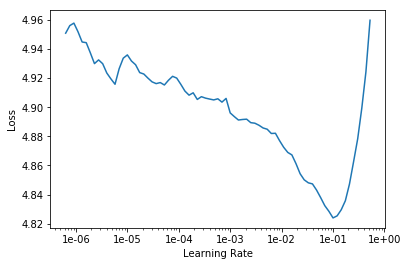

In [31]:
learn.recorder.plot(skip_end=15)

In [32]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.207191,4.056447,0.293334,23:52


In [33]:
learn.save('fit_head')

In [34]:
learn.load('fit_head');

In [35]:
learn.unfreeze()

In [36]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 